# COVID-19 Test Recognition

## Problem
The problem is that with the coronavirus, people often use antibody tests. 

<img align="right" src="1.jpg" style="width: 200px;"/>
    They get results - stripes on the test. 
    People want to make sure that they understand correctly and send photos to doctors. 
    Thus, there is a need for an algorithm that would allow to give the result of the coronavirus test based on photo.

# Importance and dataset

This problem is new and is relevant to many people. Dataset was provided by Dr. Fomin's clinic: 2 types of tests of 10 and 30 photos, respectively.

Type 1 example:  <img align="centred" src="3.jpg" style="width: 100px;"/> 









Type 2 example: <img align="centred" src="15.jpg" style="width: 100px;"/> 


# Pipeline

1. Finding countrours and appoximation as rectangle

2. Prospective transformation

3. Finding lines and getting result

4. Solition in real time

# Finding countrours and appoximation as rectangle

We use

1) Thresholding (fixed and adaptive)

2) Morphology, erode

3) FindContours

4) convexHull

5) Appoximation as rectangle

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np

In [6]:
def largest_contour(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    _, bin_img = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY)
    
    bin_img = 255 - bin_img
    kernel = np.ones((5,5))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
    kernel = np.ones((11,11))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
    
    bin_img = 255 - bin_img
        
    contours, _ = cv2.findContours(np.uint8(bin_img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    c = max(contours, key = cv2.contourArea)
    
    hull = cv2.convexHull(c)
    
    return hull

In [43]:
def next_(img_name, flag=True, flag_2=False):
    img = cv2.imread(img_name)
    img = img[:, :, ::-1]
    contour = largest_contour(img)
    img_cnt = img.copy()
    img_cnt = cv2.drawContours(img_cnt, [contour], -1, (255, 0, 0), 10)
    if flag:
        return img_cnt
    else:
        cnt = contour
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        img_cnt = img.copy()
        cv2.drawContours(img_cnt,[box],0,(0,0,255), 10)
        if flag_2:
            warped = four_point_transform(img, box)
            return warped
        else:
            return img_cnt

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import skimage.io as io

from scipy.ndimage import gaussian_filter1d

def largest_contour(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    _, bin_img = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY)
    
    bin_img = 255 - bin_img
    kernel = np.ones((5,5))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
    kernel = np.ones((11,11))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
    
    bin_img = 255 - bin_img
        
    contours, _ = cv2.findContours(np.uint8(bin_img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    c = max(contours, key = cv2.contourArea)
    
    hull = cv2.convexHull(c)
    
    return hull

def get_shpae(approx):
    if len(approx) == 3:
        shape = "triangle"
    elif len(approx) == 4:
        area = cv2.contourArea(approx)
        perimeter = cv2.arcLength(approx, True) 
        ar = area * 16 / perimeter**2
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
    else:
        shape = "circle"
    return shape

def order_points(pts):
    rect = np.zeros((4, 2), dtype = "float32")
    s = pts.reshape(4, 2).sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts.reshape(4, 2), axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect


def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

# 1.1-1.4 Finding countrours using Thresholding, Morphology, FindContours, convexHull
Examples:


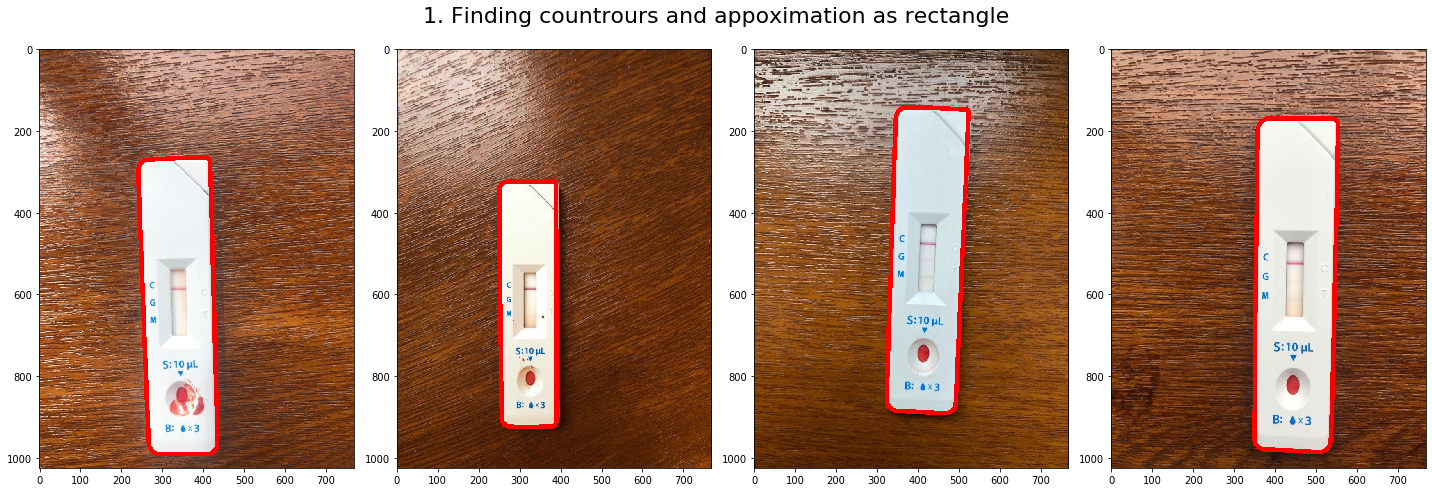

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10), tight_layout=True)
fig.suptitle('1. Finding countrours and appoximation as rectangle', fontsize=22, y=0.85)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    img_cnt = next_(img_name)
    ax[i].imshow(img_cnt)

# 1.5 Appoximation as rectangle

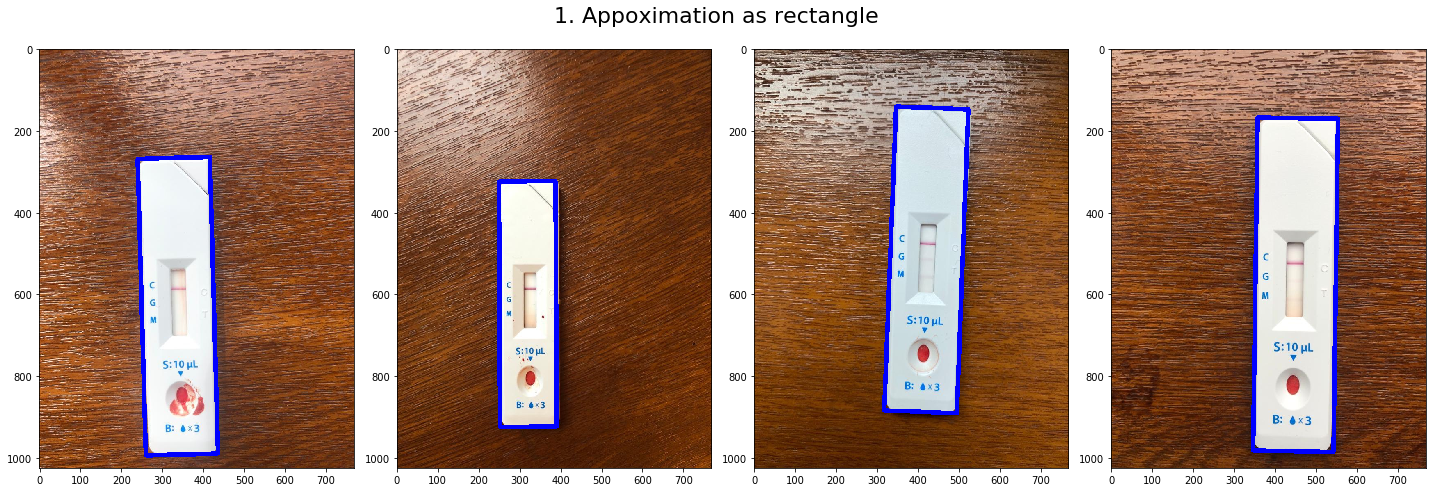

In [55]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10), tight_layout=True)
fig.suptitle('1. Appoximation as rectangle', fontsize=22, y=0.85)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    img_cnt = next_(img_name, flag=False)
    ax[i].imshow(img_cnt)

# 2. Perspective transformation

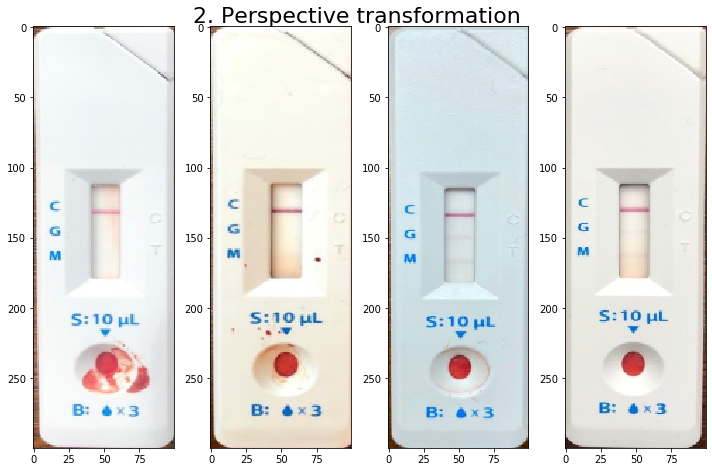

In [146]:
fig, ax = plt.subplots(1, 4, figsize=(10, 8), tight_layout=True)
fig.suptitle('2. Perspective transformation', fontsize=22, y=0.9)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    warped = next_(img_name, flag=False, flag_2=True)
    ax[i].imshow(cv2.resize(warped, (100, 300)))

# 3. Finding lines and getting result

In [136]:
def KK(im_n, flag=False):
    img = cv2.imread(im_n)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_smooth = cv2.bilateralFilter(img, 20, 100, 200)

    contour = largest_contour(img_smooth)

    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    cropped = four_point_transform(img, box).astype(np.float32)
    #l = four_point_transform(img, box)
    #plt.imshow(l)
    #plt.show()
    cropped = cropped / [cropped[:, :, 0].mean(), cropped[:, :, 1].mean(), cropped[:, :, 2].mean()] * [127, 127, 127]
    cropped = np.uint8(cropped)

    window = cropped[int(cropped.shape[0] * 0.4) : int(cropped.shape[0] * 0.6), int(cropped.shape[1] * 0.4) : int(cropped.shape[1] * 0.6), 0]
    window = 255 - window

    #plt.imshow(window, cmap='gray')
    #plt.show()

    sums = []
    for i in range(window.shape[0]):
        sums.append(sum(window[i]))

    sums /= np.sum(sums)


    l = sums.shape[0]
    m = sums.mean()
    if flag:
        res_ = ['RESULT IS :']
        #print(im_n, ": ", end='')

        if max(sums[int(l / 8):int(3 * l / 8)] - m) > 0.0001:
            #print("C ", end='')
            res_.append('C')
        if max(sums[int(3 * l / 8):int(5 * l / 8)] - m) >= 0.00003:
            #print("G ", end='')
            res_.append('G')
        if max(sums[int(5 * l / 8):int(7 * l / 8)] - m) >= 0.00005:
            #print("M ", end='')
            res_.append('M')

        #print("")
        return sums,res_
    else:
        res_ = ['RESULT IS :']
        #print(im_n, ": ", end='')

        if max(sums[int(l / 8):int(3 * l / 8)] - m) > 0.0001:
            #print("C ", end='')
            res_.append('C')
        if max(sums[int(3 * l / 8):int(5 * l / 8)] - m) >= 0.00003:
            #print("G ", end='')
            res_.append('G')
        if max(sums[int(5 * l / 8):int(7 * l / 8)] - m) >= 0.00005:
            #print("M ", end='')
            res_.append('M')

        #print("")
        return img,res_
    return sums
    plt.plot(sums, label=im_n)
    plt.hlines(sums.mean(), 0, sums.shape[0])

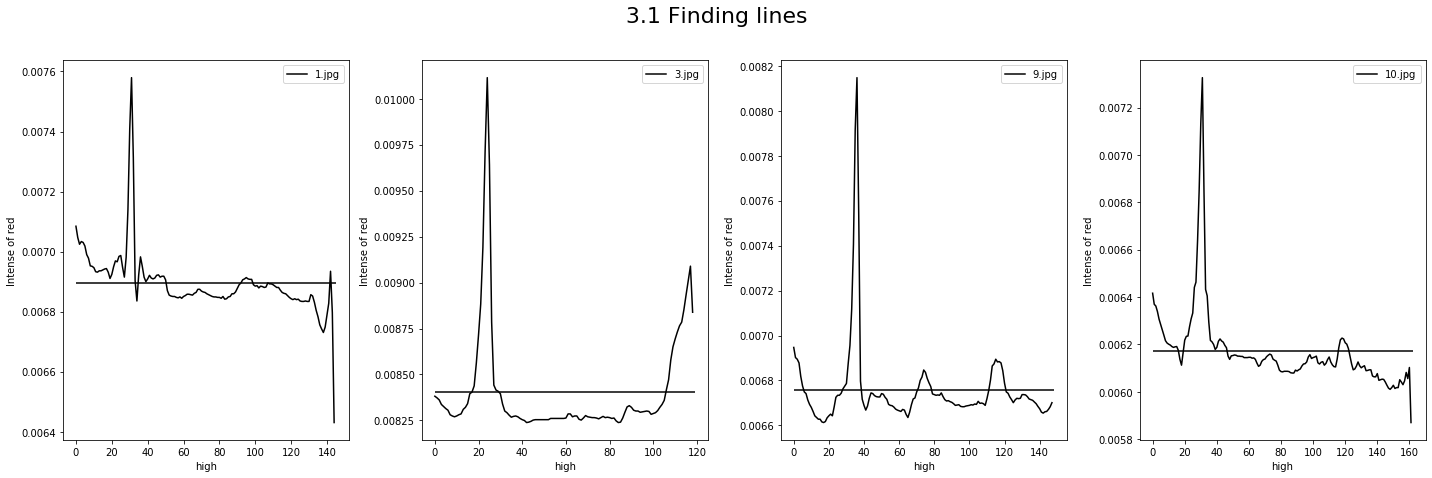

In [131]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6), tight_layout=True)
fig.suptitle('3.1 Finding lines', fontsize=22, y=1.1)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    sums = KK(img_name, flag=False)
    ax[i].set_xlabel('high')
    ax[i].set_ylabel('Intense of red')
    ax[i].plot(sums, label=img_name, color='k')
    ax[i].hlines(sums.mean(), 0, sums.shape[0])
    ax[i].legend()

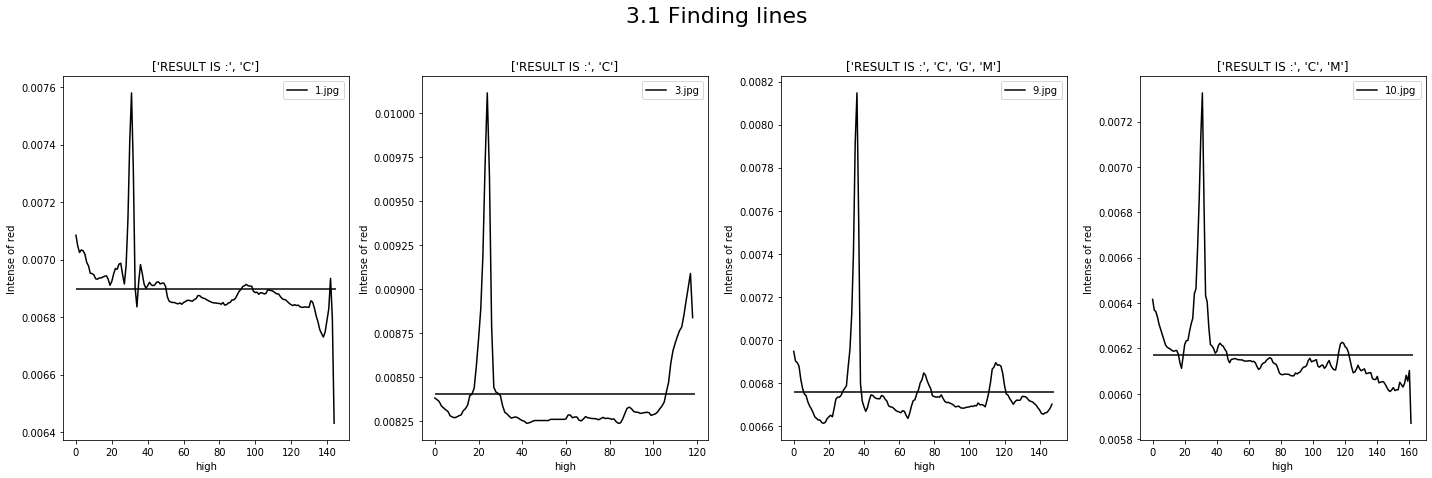

In [137]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6), tight_layout=True)
fig.suptitle('3.1 Finding lines', fontsize=22, y=1.1)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    sums, res_ = KK(img_name, flag=True)
    ax[i].set_xlabel('high')
    ax[i].set_ylabel('Intense of red')
    ax[i].set_title(res_)
    ax[i].plot(sums, label=img_name, color='k')
    ax[i].hlines(sums.mean(), 0, sums.shape[0])
    ax[i].legend()

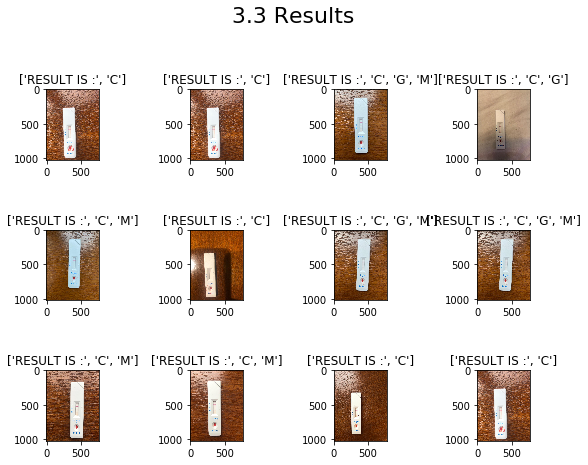

In [142]:
fig, ax = plt.subplots(3, 4, figsize=(8, 6), tight_layout=True)
fig.suptitle('3.3 Results', fontsize=22, y=1.1)
for i, img_name in enumerate(['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg']):
    x, y = i%3, i%4 
    img, res_ = KK(img_name, flag=False)
    ax[x][y].imshow(img)
    ax[x][y].set_title(res_)

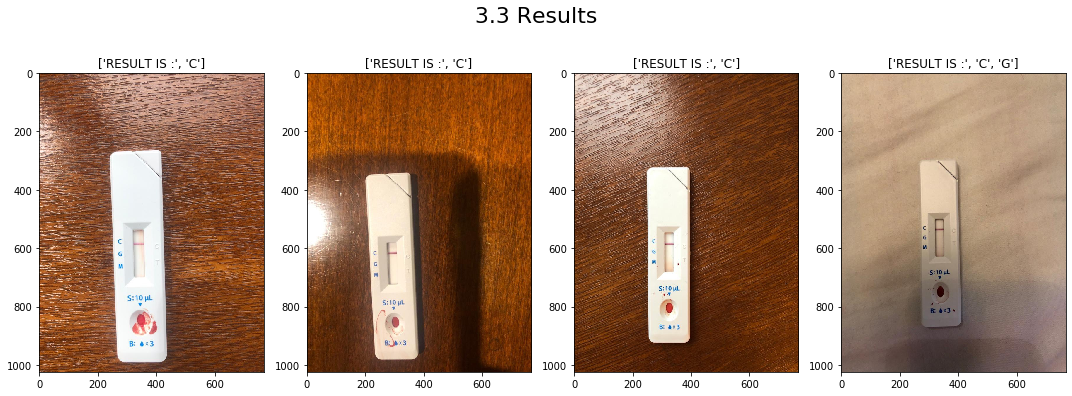

In [139]:
fig, ax = plt.subplots(1, 4, figsize=(15, 10), tight_layout=True)
fig.suptitle('3.3 Results', fontsize=22, y=0.8)
for i, img_name in enumerate(['1.jpg', '2.jpg', '3.jpg', '4.jpg']):
    img, res_ = KK(img_name, flag=False)
    ax[i].imshow(img)
    ax[i].set_title(res_)

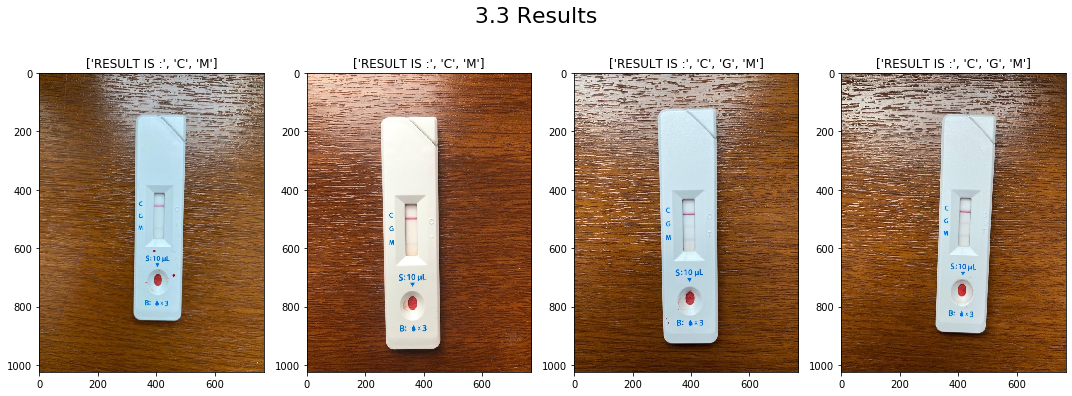

In [140]:
fig, ax = plt.subplots(1, 4, figsize=(15, 10), tight_layout=True)
fig.suptitle('3.3 Results', fontsize=22, y=0.8)
for i, img_name in enumerate(['5.jpg', '6.jpg', '7.jpg', '9.jpg']):
    img, res_ = KK(img_name, flag=False)
    ax[i].imshow(img)
    ax[i].set_title(res_)

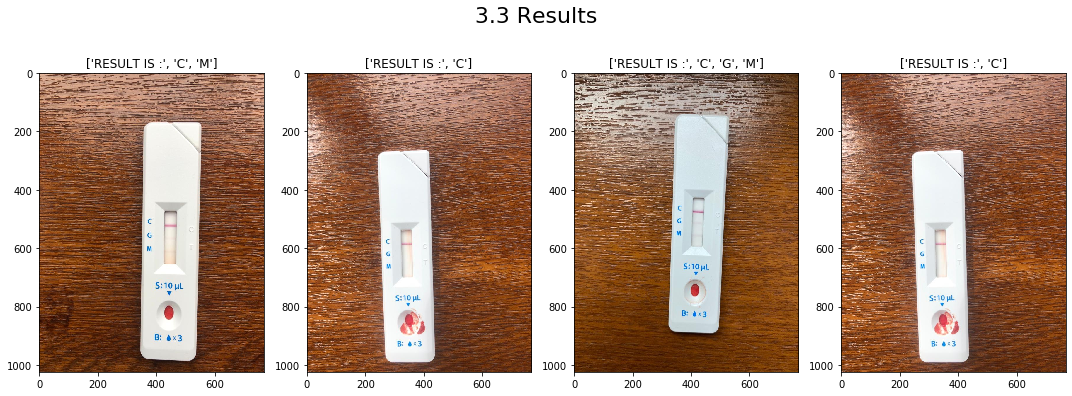

In [141]:
fig, ax = plt.subplots(1, 4, figsize=(15, 10), tight_layout=True)
fig.suptitle('3.3 Results', fontsize=22, y=0.8)
for i, img_name in enumerate(['10.jpg', '11.jpg', '12.jpg', '13.jpg']):
    img, res_ = KK(img_name, flag=False)
    ax[i].imshow(img)
    ax[i].set_title(res_)

# 3.3 Results

In [144]:
from sklearn import metrics
y_pred = [0,0,0,2,1,1,3,3,1,0,3,0]
y_true = [0,0,0,0,1,1,3,3,3,0,3,0]
print(metrics.confusion_matrix(y_true, y_pred))


[[5 0 1 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 1 0 3]]


In [145]:
print(metrics.classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.833     0.909         6
           1      0.667     1.000     0.800         2
           2      0.000     0.000     0.000         0
           3      1.000     0.750     0.857         4

    accuracy                          0.833        12
   macro avg      0.667     0.646     0.642        12
weighted avg      0.944     0.833     0.874        12



/Users/mariadonskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 4. Solution in real time


<video style="width:70%" controls src="Saving.mov"></video>

# Conclusions


1. We solved the problem from start to the end!

2. Possible improvements 

3. Disadvantages

4. Problems



# Speech
Good morning, everyone! Our project is called COVID-19 test recongition. Project was made by Konstantin Soshin and Donskova Mariya.

1.1 The problem is that with the coronavirus, people often use antibody tests, which have a form of white boxes. Depending on the type and presence of antibodies, they get results - lines on the test. As practice shows, people want to make sure that the result they were able to understand correctly and send photos to doctors to confirm the diagnosis. Thus, there is a need for an algorithm that would allow to give the result of the coronavirus test based on photo. The project is completely a computer vision problem.

1.2 As has already been said, this problem is relevant today and according to our data, there is no ready solution at the moment. Dataset is small, provided by Dr. Fomin's clinic, hand-collected by people. Dataset consists of two types of tests. The test of the first type is more rectangular and the letters are on the left side of the window with the lines. The test of the second type is more square and has red letters on the right side. In both tests there are 3 types of letters: c- control, indicate, that the test was performed correctly, G and M - types of antibodies. We solved the problem for both types of tests.

1.3 There is our pipeline: firstly, we will find countrours and appoximate it as rectangle. For  this image we will apply prospective transformation, then we will analyse lines, which indicate antibodies, and get result. Also we create a system, which allows to use our solution in real time with web-cameras.

2.1 Let's start with "Finding countrours and appoximation as rectangle". In these section we use several approaches such as fixed and adaptive thresholding to get binarized image. And different morphological transformations such as, erosion, opening and closing to get smooth uniform masks without artifacts. Then we use OpenCV functions FindContours and convexHull, which helps us to get contours of antibody tests. Here you can see result of this procedure. Lastly, we find bounding recatangle for contour in order to get the right geometrical transformation.

2.2  Here you can see result of this approach. We approximated the rectangle because our predictions depend on how accurately the window with the lines is cut out.

2.3 Here we can see results of perspective transformation.

3.1, 3.2 Now let's turn to the most tricky and the most important problem. Let's speak about identifying red lines on the anti-bodies test. Since we have found cropped image of the test and we know its type, we can easily crop region of interest - little window with red lines. Then we do as follows. We find sum of red channel pixels in each row and divide that numbers by the sum of all red pixels. The gives us distrubition of red color along vertical axis on that patch. Then it becomes absolutely clear, that desired red lines correspond to peaks in that distrubitions. For example, as we can clearly see on the picture below, the most significant peak is a bright line, which corresponds to label 'C' on the test. So, the task is to identify small peaks, corresponding to lines G and M. To achive it, we count maximum of distrbition over the second and the third thirds of the range, where we expect to find peaks. If maximum is higher then some threshold, we mark it as a peak.

3.3 Now let's take a closer look at the results. You may not be able to see the stripes from the screen, because they are very thin for antibodies, which is the difficulty of this task. In general, our algorithm incorrectly identified only 2 letters out of all 12 pictures, giving a false-positive result, which is not so bad. To analyze the metrics, we built a matrix and used it to calculate the various metrics you see on the screen.

4.1 Also, we tried to implement real-time recognition of covid19 anti-body test. Unfortunately, we had only one such test, and, hopefully it was negative)) Let's look at viseo. So we couldn't perform many experiments with real-time recognizing, but one test is indentified quite well, as it can be seen from the video. Besides, we can look how works detection of our test. We can notice that detection accuracy depends on background and illumination conditions.

4.2 In my opinion, we solved the problem from start to the end. We cut the tests in images, analyzed its lines and gave the test result. There are many possible improvements for this problem: since there were two types of tests, we had to write different functions for analysis, in theory this could be combined into a single function. Also the processing of the results strongly depended on the quality of bounding, as seen in the video, depending on the bounding, the algorithm gave false results for a few seconds. Also the problem turned out to be complicated in terms of the fact that the lines responsible for antibodies are quite thin, which also affects the stability and quality of the algorithm. 

Thank you for you attention!